<a href="https://colab.research.google.com/github/FranceskoM/Francesko-s-python-notebook/blob/main/Francesko's_python_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "Change_2022_Google Analytics Ma.xlsx"
df = pd.read_excel(file_path)

# Display basic information about the dataset
print(df.info())
print("\nSample data:")
print(df.head())

# Summary statistics
print("\nSummary statistics:")
print(df.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47529 entries, 0 to 47528
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   City, Country            47529 non-null  object        
 1   Audience                 47140 non-null  object        
 2   Campaign                 47529 non-null  object        
 3   Date                     47529 non-null  datetime64[ns]
 4   Platform                 47528 non-null  object        
 5   Ad Format                29519 non-null  object        
 6   Creative - Family        47529 non-null  object        
 7   Creative - Version       47529 non-null  object        
 8   Total Sessions           47529 non-null  int64         
 9   Days away from max date  47529 non-null  int64         
 10  Latest report?           47529 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 4.0+ MB
None

Sample data:
          

<ipython-input-5-6254ec2179f4>:16: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df.describe(include='all'))


**Check for missing values**

In [ ]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
City, Country                  0
Audience                     389
Campaign                       0
Date                           0
Platform                       1
Ad Format                  18010
Creative - Family              0
Creative - Version             0
Total Sessions                 0
Days away from max date        0
Latest report?                 0
dtype: int64


**Question 1: What is the distribution of Total Sessions?**


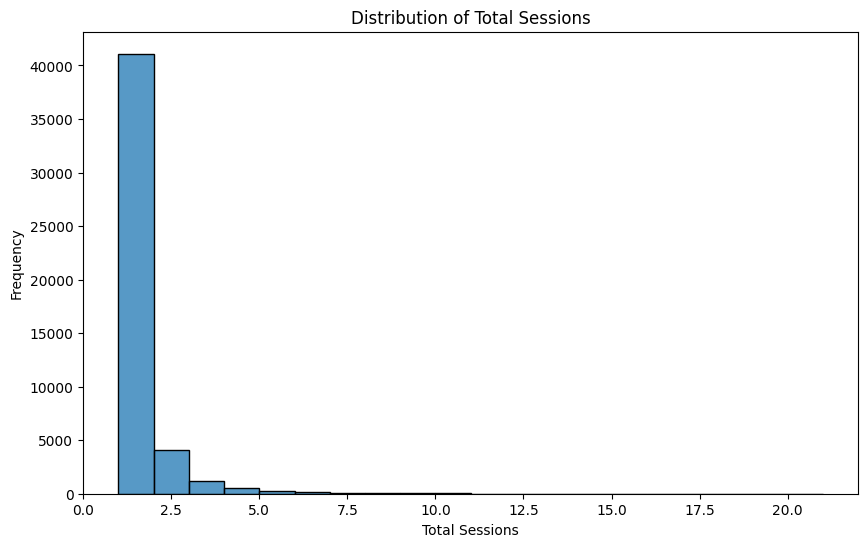

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Total Sessions', bins=20)
plt.title('Distribution of Total Sessions')
plt.xlabel('Total Sessions')
plt.ylabel('Frequency')
plt.show()

**Question 2: How does the Days away from max date vary by Audience?**

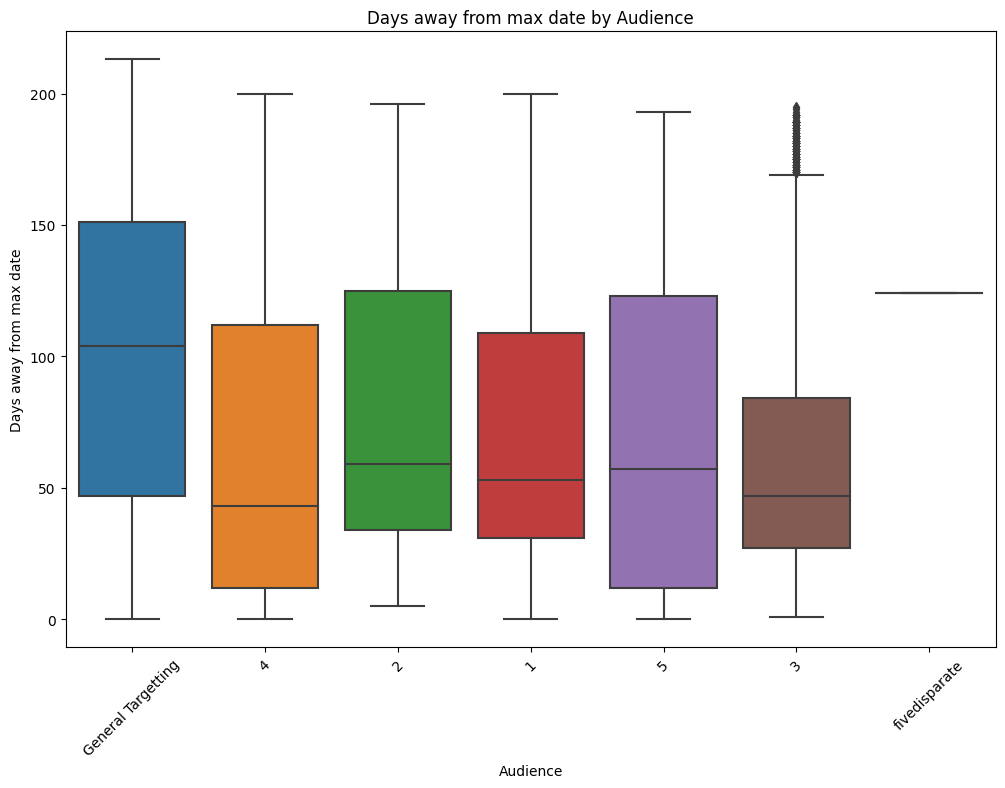

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Audience', y='Days away from max date')
plt.title('Days away from max date by Audience')
plt.xlabel('Audience')
plt.ylabel('Days away from max date')
plt.xticks(rotation=45)
plt.show()


**Question 3: What is the correlation between Total Sessions and Days away from max date?**

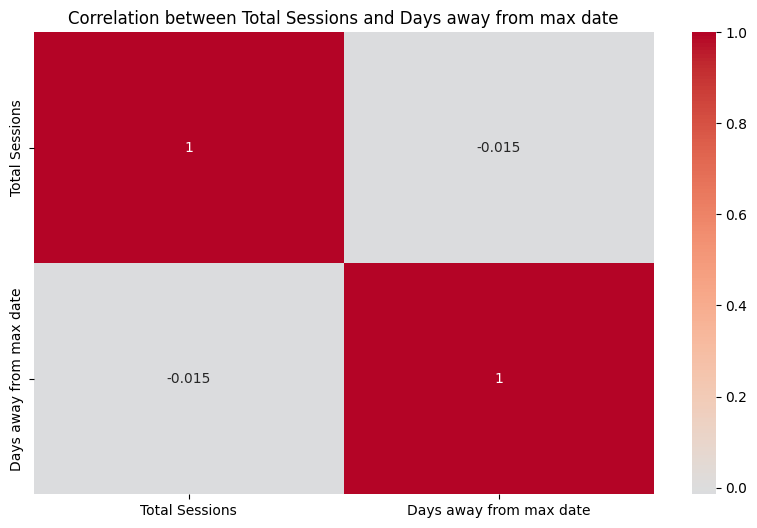

In [ ]:
plt.figure(figsize=(10, 6))
correlation_matrix = df[['Total Sessions', 'Days away from max date']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Total Sessions and Days away from max date')
plt.show()


**Question 4: What are the top Campaigns based on the number of Total Sessions?**

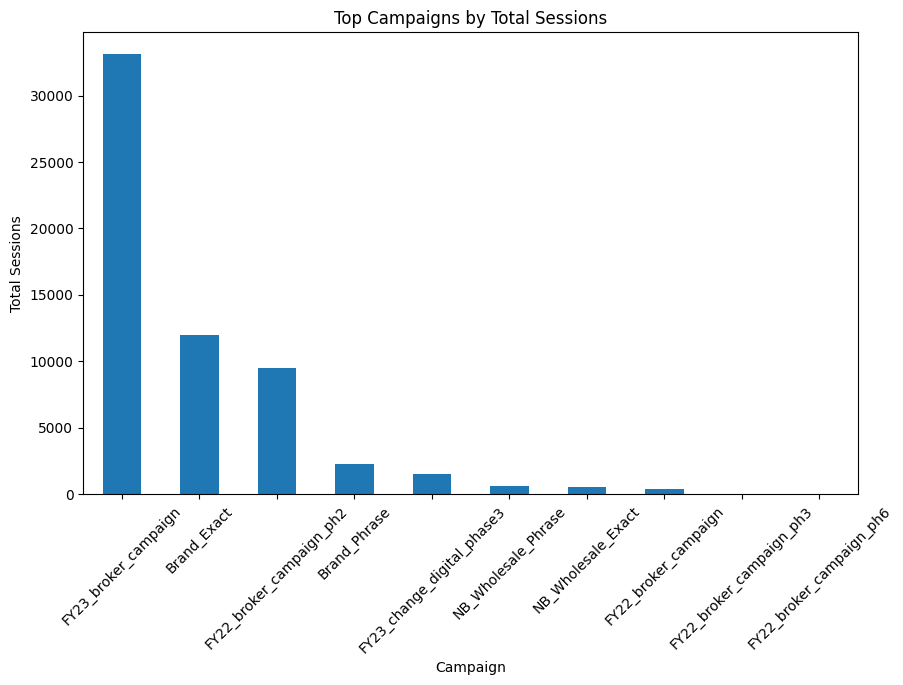

In [ ]:
top_campaigns = df.groupby('Campaign')['Total Sessions'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_campaigns.plot(kind='bar')
plt.title('Top Campaigns by Total Sessions')
plt.xlabel('Campaign')
plt.ylabel('Total Sessions')
plt.xticks(rotation=45)
plt.show()


**Question 5: How does the Ad Format distribution look like across different Platforms?**

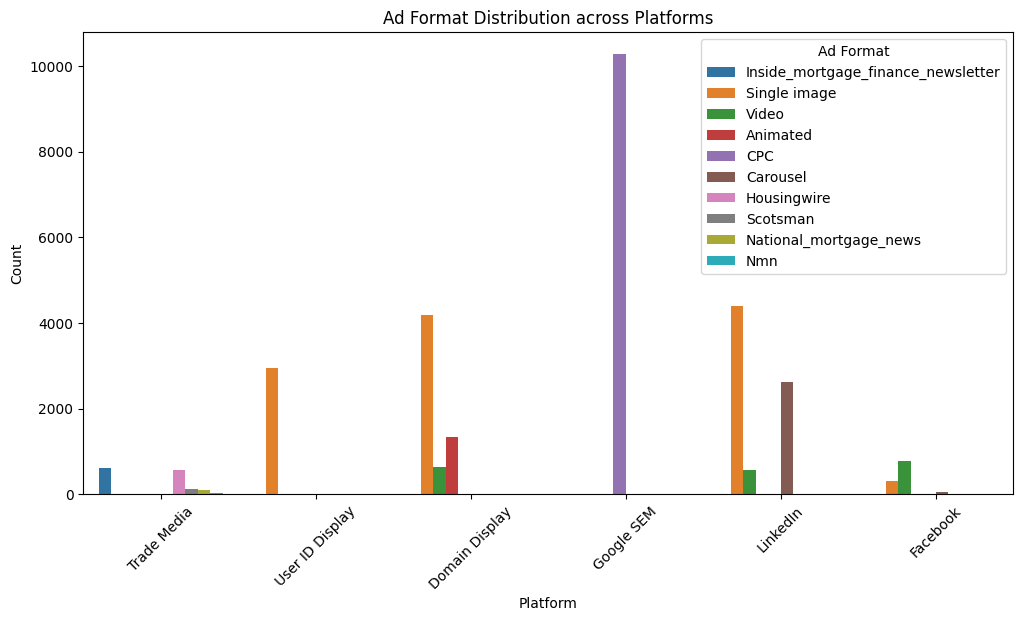

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Platform', hue='Ad Format')
plt.title('Ad Format Distribution across Platforms')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Ad Format')
plt.show()


**Question 6: How do the Total Sessions vary across different Cities?**

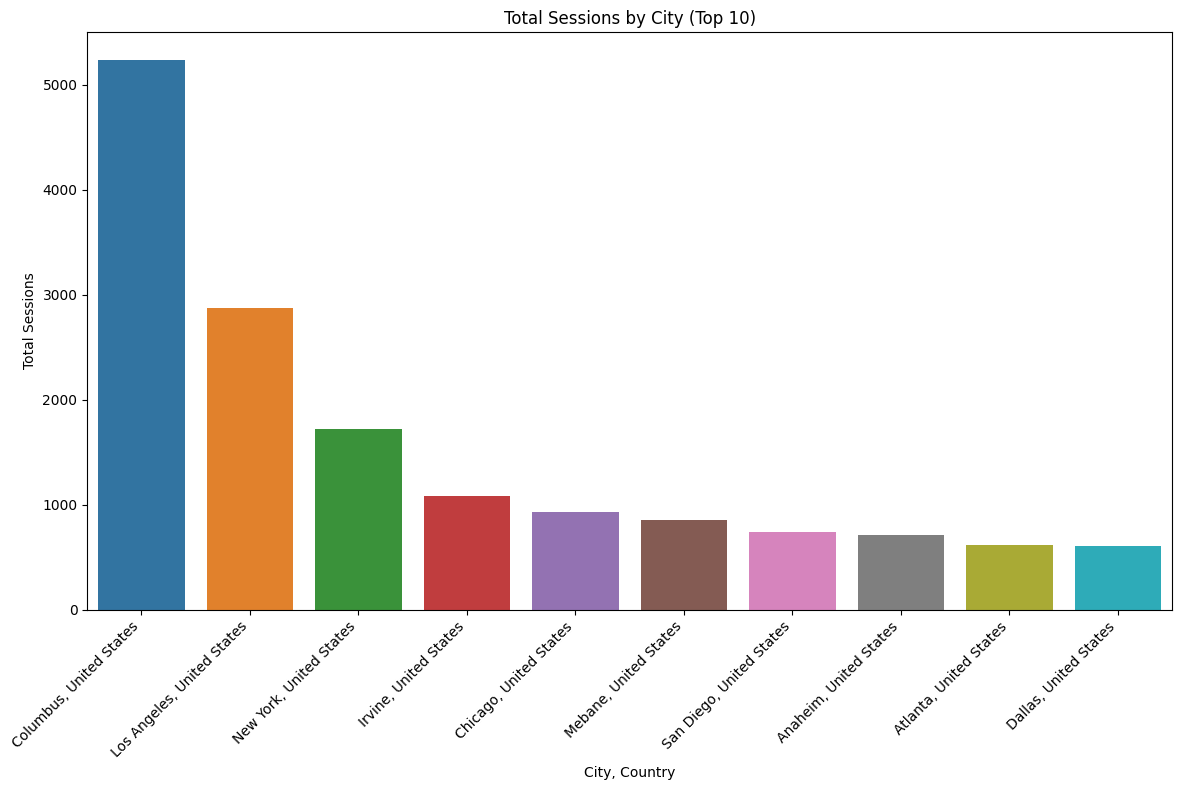

In [ ]:
plt.figure(figsize=(12, 8))
top_cities = df.groupby('City, Country')['Total Sessions'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.title('Total Sessions by City (Top 10)')
plt.xlabel('City, Country')
plt.ylabel('Total Sessions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



**Question 7: What is the distribution of Days away from max date for each Audience?**

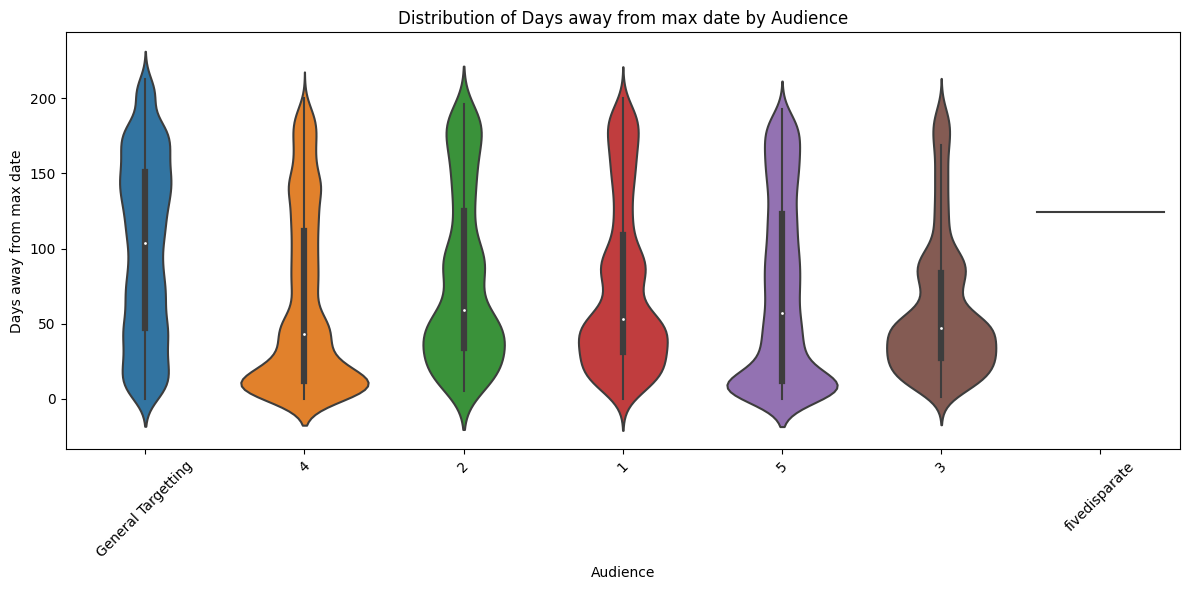

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Audience', y='Days away from max date')
plt.title('Distribution of Days away from max date by Audience')
plt.xlabel('Audience')
plt.ylabel('Days away from max date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Question 8: Countplot of Audience**


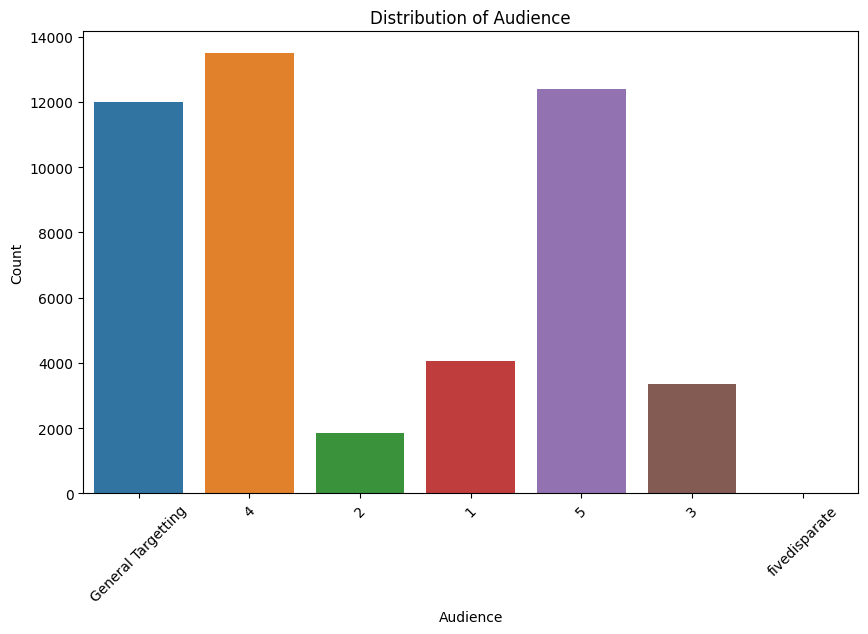

In [ ]:
# Example: Countplot of Audience
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Audience')
plt.title('Distribution of Audience')
plt.xlabel('Audience')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Question 9: How closely do the predicted total sessions match the actual total sessions based on the Random Forest Regression model?**

Root Mean Squared Error (RMSE): 1.0337998052431308


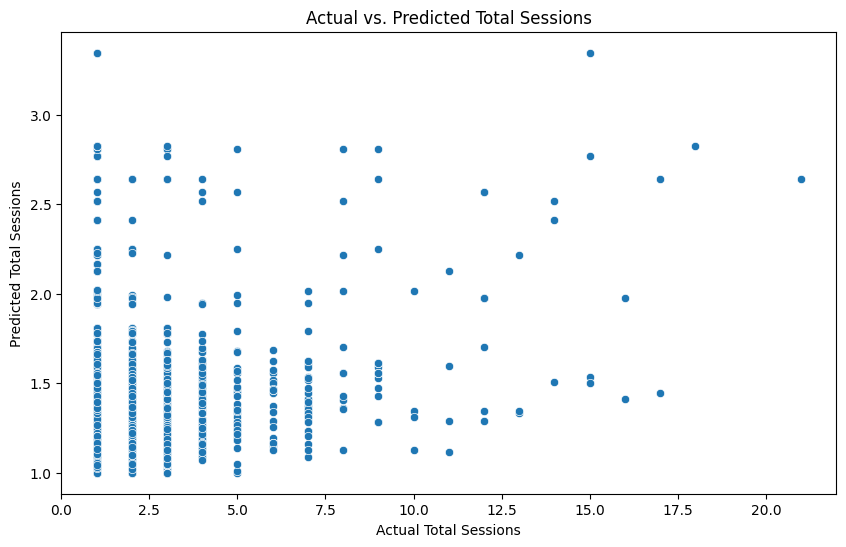

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "Change_2022_Google Analytics Ma.xlsx"
df = pd.read_excel(file_path)

# Select features for the model
features = ['Days away from max date', 'Audience']
X = df[features]
y = df['Total Sessions']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['Audience'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs. Predicted Total Sessions')
plt.xlabel('Actual Total Sessions')
plt.ylabel('Predicted Total Sessions')
plt.show()
